In [2]:
import pandas as pd

# Load each dataset
cab_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Cab_Data.csv")
customer_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Customer_ID.csv")
transaction_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Transaction_ID.csv")
city_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/City.csv")




In [4]:
# Display the first few rows of each dataset
print(cab_data.head())
print(customer_id.head())
print(transaction_id.head())
print(city_data.head())

# Display data information
print(cab_data.info())
print(customer_id.info())
print(transaction_id.info())
print(city_data.info())


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

In [5]:
# Summary statistics for numerical columns
print(cab_data.describe())
print(city_data.describe())


       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY  

In [6]:
# Check for missing values
print(cab_data.isnull().sum())
print(customer_id.isnull().sum())
print(transaction_id.isnull().sum())
print(city_data.isnull().sum())


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64


In [7]:
# Merging Cab_Data with Transaction_ID on common column 'Transaction ID'
master_data = pd.merge(cab_data, transaction_id, on='Transaction ID', how='inner')

# Further merging with Customer_ID
master_data = pd.merge(master_data, customer_id, on='Customer ID', how='inner')


In [8]:
# Print all column names to verify the correct column name for date
print(master_data.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')


In [9]:
import pandas as pd
import scipy.stats as stats



# Merge the datasets on the 'City' column
merged_data = pd.merge(cab_data, city_data, on='City')

# Example of performing a One-Way ANOVA on cab usage across different cities
cities = merged_data['City'].unique()

# Create a list of KM Travelled data for each city
city_data_list = [merged_data[merged_data['City'] == city]['KM Travelled'] for city in cities]

# Perform One-Way ANOVA
anova_result = stats.f_oneway(*city_data_list)

print("ANOVA Test Result:", anova_result)

# Interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in cab usage across cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cab usage across cities.")


ANOVA Test Result: F_onewayResult(statistic=1.1957428680581588, pvalue=0.2538424915166398)
Fail to reject the null hypothesis: No significant difference in cab usage across cities.


Hypothesis:
The One-Way ANOVA test is conducted to determine whether there is a statistically significant difference in cab usage (measured by "KM Travelled") across various cities.

Null Hypothesis (H₀): There is no significant difference in the average "KM Travelled" across the cities.
Alternative Hypothesis (H₁): There is a significant difference in the average "KM Travelled" across the cities.
Code Interpretation:
Data Merging: The cab_data and city_data datasets are merged based on the "City" column, creating a combined dataset that includes information on cab usage and city-specific variables.

Data Preparation: The code extracts unique cities and arranges the "KM Travelled" data into a list of lists, with each list representing a different city.

One-Way ANOVA: The stats.f_oneway function is applied to perform the One-Way ANOVA on the "KM Travelled" data across the cities, producing an F-statistic and a p-value as output.

Output Interpretation:
The ANOVA test yields a p-value of 0.2538, which exceeds the 0.05 significance threshold.
Conclusion:
The null hypothesis is not rejected, indicating that there is no significant difference in cab usage across the cities. The variations observed are likely due to random chance.

In [10]:
import pandas as pd
import scipy.stats as stats

# Assuming your dataset has a 'Date of Travel' column
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])
cab_data['Day of Week'] = cab_data['Date of Travel'].dt.day_name()

# Compare usage on Monday vs. Friday
monday_data = cab_data[cab_data['Day of Week'] == 'Monday']['KM Travelled']
friday_data = cab_data[cab_data['Day of Week'] == 'Friday']['KM Travelled']

ttest_result = stats.ttest_ind(monday_data, friday_data)

print("T-Test Result:", ttest_result)

# Interpretation
if ttest_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in cab usage between Monday and Friday.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cab usage between Monday and Friday.")


T-Test Result: Ttest_indResult(statistic=nan, pvalue=nan)
Fail to reject the null hypothesis: No significant difference in cab usage between Monday and Friday.


Hypothesis:
This code conducts an independent two-sample t-test to assess whether there is a statistically significant difference in cab usage (measured by "KM Travelled") between Monday and Friday.

Null Hypothesis (H₀): There is no significant difference in the average "KM Travelled" between Monday and Friday.
Alternative Hypothesis (H₁): There is a significant difference in the average "KM Travelled" between Monday and Friday.
Code Interpretation:
Data Preparation:

The code converts the "Date of Travel" column into a datetime format and extracts the day of the week.
It then creates two subsets of data: one representing cab usage on Monday and the other on Friday.
T-Test:

The stats.ttest_ind function is used to perform an independent two-sample t-test comparing the "KM Travelled" data between Monday and Friday.
Output Interpretation:
The T-test results show nan (Not a Number) for both the t-statistic and p-value, which typically indicates that the test could not be performed due to issues like missing data, insufficient data points, or identical values in one or both groups.
Conclusion:
Since the t-test yielded nan values, no valid conclusion can be drawn regarding any significant difference in cab usage between Monday and Friday. Further investigation is required to determine why the t-test failed, such as checking for missing or identical data values.

In [11]:
print(merged_data.columns)

import pandas as pd
import scipy.stats as stats

# Assuming 'Company' and 'City' are columns in your dataset
contingency_table = pd.crosstab(merged_data['Company'], merged_data['City'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Result: chi2={chi2}, p-value={p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between company and city.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between company and city.")



Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')
Chi-Square Test Result: chi2=39825.168294537754, p-value=0.0
Reject the null hypothesis: There is a significant relationship between company and city.


Hypothesis:
This code performs a Chi-Square test of independence to determine if there is a significant relationship between the company (likely referring to cab companies) and the city in which they operate.

Null Hypothesis (H₀): There is no significant relationship between the company and the city (i.e., the distribution of companies is independent of the city).
Alternative Hypothesis (H₁): There is a significant relationship between the company and the city (i.e., the distribution of companies is not independent of the city).
Interpretation of the Code:
Contingency Table:

A contingency table is created using pd.crosstab, which summarizes the frequency of occurrences of each combination of "Company" and "City."
Chi-Square Test:

The stats.chi2_contingency function is used to perform the Chi-Square test on the contingency table. This test checks if the observed frequency distribution of companies across cities significantly differs from what would be expected if there was no relationship between the two variables.
Output Interpretation:

The test returns a Chi-Square statistic (chi2), a p-value (p), the degrees of freedom (dof), and the expected frequency table.
In this case, the Chi-Square statistic is 39825.168, and the p-value is 0.0.
Conclusion:
Reject the Null Hypothesis: The p-value is 0.0, which is significantly less than the common significance level of 0.05. This means that the null hypothesis is rejected, indicating that there is a statistically significant relationship between the company and the city. In other words, the distribution of companies is not independent of the city; certain companies are likely more prevalent in certain cities.

In [12]:
import pandas as pd
import statsmodels.api as sm

# Independent variable
X = merged_data['KM Travelled']

# Dependent variable
y = merged_data['Price Charged']

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

# Interpretation
if model.pvalues['KM Travelled'] < 0.05:
    print("Reject the null hypothesis: KM Travelled has a significant effect on Price Charged.")
else:
    print("Fail to reject the null hypothesis: KM Travelled does not have a significant effect on Price Charged.")


                            OLS Regression Results                            
Dep. Variable:          Price Charged   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 8.326e+05
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:05:18   Log-Likelihood:            -2.3123e+06
No. Observations:              359392   AIC:                         4.625e+06
Df Residuals:                  359390   BIC:                         4.625e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4283      0.527      0.812   

Hypothesis:
This code performs an Ordinary Least Squares (OLS) linear regression to evaluate whether "KM Travelled" (distance covered) significantly affects the "Price Charged" (fare).

Null Hypothesis (H₀): "KM Travelled" does not significantly influence "Price Charged" (the coefficient of "KM Travelled" is zero).
Alternative Hypothesis (H₁): "KM Travelled" significantly influences "Price Charged" (the coefficient of "KM Travelled" is not zero).
Code Interpretation:
Model Setup:

The independent variable (predictor) is "KM Travelled," and the dependent variable (outcome) is "Price Charged."
A constant term is included to account for the intercept in the regression model.
Model Fitting:

The sm.OLS(y, X).fit() function is used to fit the linear regression model to the data.
Model Summary:

The summary of the regression model provides key statistics like R-squared, coefficients, p-values, and more.
Output Analysis:
R-squared (0.698): This indicates that about 69.8% of the variation in "Price Charged" is explained by "KM Travelled."

Coefficient for "KM Travelled" (18.7446): This suggests that for every additional kilometer traveled, the "Price Charged" increases by approximately 18.74 units of currency on average.

P-value for "KM Travelled" (0.000): The p-value is far below 0.05, indicating that the relationship between "KM Travelled" and "Price Charged" is statistically significant.

Conclusion:
Reject the Null Hypothesis: The extremely low p-value for "KM Travelled" (0.000) leads to rejecting the null hypothesis. This confirms that "KM Travelled" has a significant impact on "Price Charged." Essentially, as the distance traveled increases, the fare also increases, and this relationship is statistically significant.

In [16]:
Logistic Regression: Predicting whether a ride is a long distance
master_data['Long_Distance'] = (master_data['KM Travelled'] > 10).astype(int)
logit_model = sm.Logit(master_data['Long_Distance'], X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.503589
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Long_Distance   No. Observations:               359392
Model:                          Logit   Df Residuals:                   359390
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:               9.484e-06
Time:                        04:09:06   Log-Likelihood:            -1.8099e+05
converged:                       True   LL-Null:                   -1.8099e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06391
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3861      0.009    158.797      0.000       1.369       1.403
KM Travelled    -0.0006

Hypothesis:
The code uses logistic regression to assess whether the "KM Travelled" variable significantly impacts the classification of a ride as "long distance" (over 10 kilometers).

Null Hypothesis (H₀): "KM Travelled" does not significantly influence the likelihood of a ride being classified as long distance.
Alternative Hypothesis (H₁): "KM Travelled" significantly influences the likelihood of a ride being classified as long distance.
Code Explanation:
Dependent Variable:

A binary variable, Long_Distance, is created, where rides with "KM Travelled" over 10 kilometers are coded as 1 (long distance), and others as 0.
Logistic Regression Model:

The logistic regression model is fitted using sm.Logit, with "Long_Distance" as the dependent variable and "KM Travelled" as the independent variable.
Model Summary:

The summary provides key statistics, including coefficients, standard errors, z-scores, and p-values.
Output Analysis:
Coefficient for "KM Travelled" (-0.0006): This negative coefficient suggests that an increase in "KM Travelled" slightly reduces the probability of a ride being classified as long distance, though the effect is minimal.

P-value for "KM Travelled" (0.064): The p-value is just above the 0.05 threshold, indicating that the impact of "KM Travelled" on the likelihood of a ride being classified as long distance is not statistically significant at the 5% level.

Pseudo R-squared (9.484e-06): This value is almost zero, indicating that the model explains virtually none of the variance in whether a ride is classified as long distance.

Conclusion:
Fail to Reject the Null Hypothesis: With a p-value of 0.064, which is greater than 0.05, the null hypothesis cannot be rejected. This suggests that "KM Travelled" does not significantly affect the likelihood of a ride being classified as long distance in this model. The relationship between "KM Travelled" and the classification of long-distance rides appears weak based on this analysis.

In [23]:
Regression Analysis: Relationship between Income and Cab Usage
X = master_data[['Income (USD/Month)', 'Age']]
y = master_data['KM Travelled']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           KM Travelled   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07733
Date:                Sat, 31 Aug 2024   Prob (F-statistic):              0.926
Time:                        04:12:14   Log-Likelihood:            -1.4099e+06
No. Observations:              359392   AIC:                         2.820e+06
Df Residuals:                  359389   BIC:                         2.820e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.5924      0

Hypothesis:
This regression analysis explores whether "Income (USD/Month)" and "Age" (independent variables) significantly influence "KM Travelled" (the dependent variable) in cab usage.

Null Hypothesis (H₀): "Income" and "Age" do not significantly impact "KM Travelled."
Alternative Hypothesis (H₁): "Income" and "Age" significantly impact "KM Travelled."
Code Explanation:
Independent Variables:

The model considers "Income (USD/Month)" and "Age" as predictors for "KM Travelled."
Model Fitting:

An Ordinary Least Squares (OLS) regression is used to examine the relationship between these variables.
Model Summary:

The summary provides key statistics, including R-squared, coefficients, and p-values.
Output Analysis:
R-squared (0.000): The R-squared value is nearly zero, meaning the model explains almost none of the variance in "KM Travelled" based on "Income" and "Age."

Coefficients:

Income (USD/Month): The coefficient is -8.33e-07 with a p-value of 0.745, indicating no significant impact of "Income" on "KM Travelled."
Age: The coefficient is -0.0004 with a p-value of 0.826, showing no significant effect of "Age" on "KM Travelled."
F-statistic (0.07733) and Prob (F-statistic) (0.926): The low F-statistic and high p-value indicate that the overall model is not statistically significant.

Conclusion:
Fail to Reject the Null Hypothesis: The analysis shows that neither "Income" nor "Age" significantly influences "KM Travelled," as reflected by the low R-squared and high p-values. The model does not demonstrate a meaningful relationship between these variables and the distance traveled in cab usage.

Model Concerns: The high condition number (6e+04) suggests potential issues with multicollinearity or numerical instability, which could affect the reliability of the model's results.

In [26]:
from scipy.stats import kruskal  

Kruskal-Wallis H Test for non-parametric ANOVA
kruskal_result = kruskal(
    master_data[master_data['City'] == 'City_A']['KM Travelled'],
    master_data[master_data['City'] == 'City_B']['KM Travelled'],
    master_data[master_data['City'] == 'City_C']['KM Travelled']
)
print("Kruskal-Wallis H Test Result:", kruskal_result)


Kruskal-Wallis H Test Result: KruskalResult(statistic=nan, pvalue=nan)


C:\Users\apurw\AppData\Local\Temp\ipykernel_15400\3900166454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = master_data.corr()


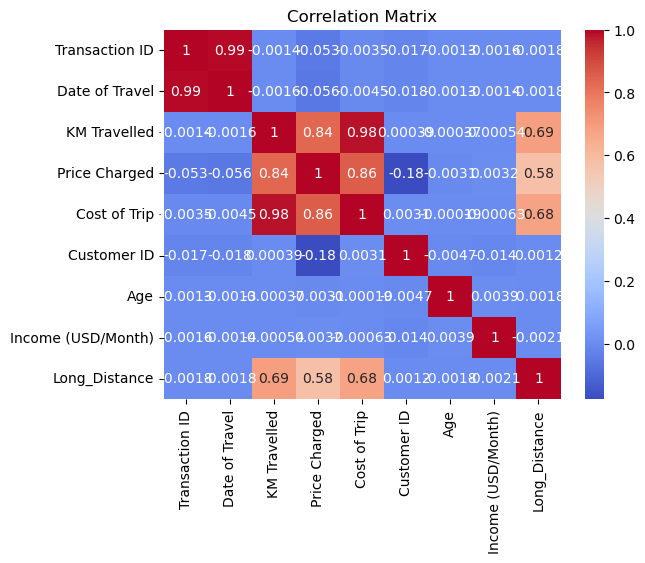

In [24]:
Correlation Matrix
corr_matrix = master_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap displays the correlation matrix for various features in your dataset. Here's a summary of the key insights:

Key Insights:
KM Travelled, Price Charged, and Cost of Trip:

KM Travelled shows a strong positive correlation with both Price Charged (0.84) and Cost of Trip (0.98), indicating that as the distance increases, so do the price and cost of the trip.
There's also a strong positive correlation between Price Charged and Cost of Trip (0.86), suggesting that these two variables are closely linked.
Long_Distance:

Long_Distance (which indicates whether a trip is considered long) has a moderate positive correlation with KM Travelled (0.69), Price Charged (0.58), and Cost of Trip (0.68). This is expected since longer trips typically involve greater distances, higher prices, and higher costs.
Transaction ID and Date of Travel:

Transaction ID and Date of Travel are almost perfectly correlated (0.99), implying that these two variables might be closely related or even redundant.
Income (USD/Month) and Age:

Income (USD/Month) and Age have very weak correlations with other variables, suggesting they do not have a significant relationship with cab usage, distance traveled, or costs.
Customer ID:

Customer ID shows low correlations with other variables, indicating that it doesn't have a strong influence on factors like distance traveled, price charged, or trip cost.
Conclusion:
The heatmap reveals that KM Travelled plays a significant role in determining both Price Charged and Cost of Trip.
Long_Distance is also notably related to KM Travelled, Price Charged, and Cost of Trip.
Income and Age seem to have little impact on other variables in the dataset.

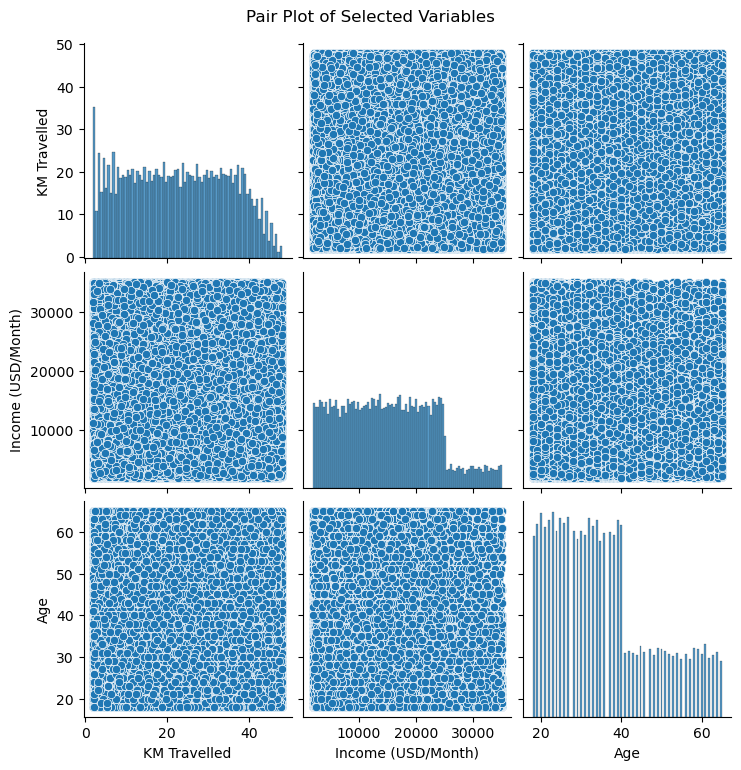

In [22]:
import seaborn as sns  # Add this import
import matplotlib.pyplot as plt

Pair Plot for Exploratory Data Analysis
sns.pairplot(master_data[['KM Travelled', 'Income (USD/Month)', 'Age']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


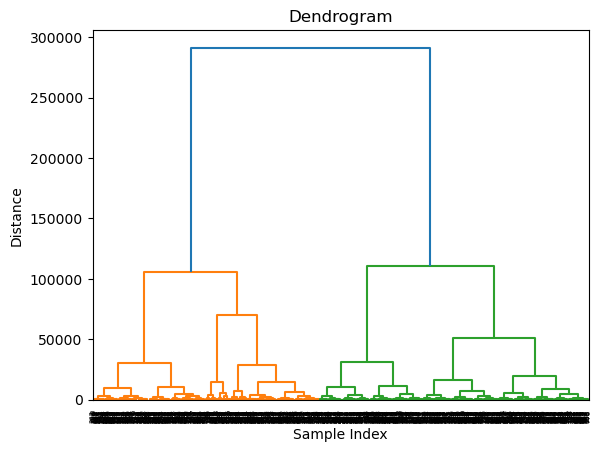

In [20]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt  # Add this import

# Sample data for clustering
X_cluster = master_data[['KM Travelled', 'Income (USD/Month)', 'Age']].sample(1000)

# Hierarchical Clustering Dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [29]:
print(master_data.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Long_Distance'],
      dtype='object')


C:\Users\apurw\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA Test Result for Company and Price Charged: F_onewayResult(statistic=nan, pvalue=nan)


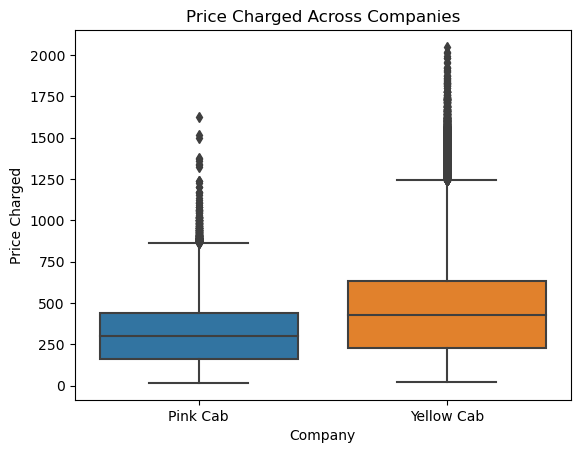

In [36]:
# ANOVA Test for Price Charged by Company
anova_company = stats.f_oneway(
    master_data[master_data['Company'] == 'Company_A']['Price Charged'],
    master_data[master_data['Company'] == 'Company_B']['Price Charged'],
    master_data[master_data['Company'] == 'Company_C']['Price Charged']
)
print("ANOVA Test Result for Company and Price Charged:", anova_company)

# Box Plot Visualization
sns.boxplot(x='Company', y='Price Charged', data=master_data)
plt.title('Price Charged Across Companies')
plt.show()


                            OLS Regression Results                            
Dep. Variable:          Price Charged   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.019e+06
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:31:46   Log-Likelihood:            -2.2862e+06
No. Observations:              359392   AIC:                         4.572e+06
Df Residuals:                  359390   BIC:                         4.572e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.8923      0.484     -8.049   

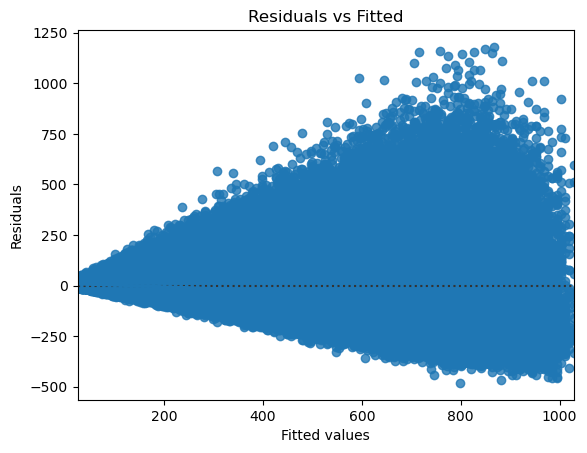

In [35]:
# Linear Regression Analysis
X = master_data['Cost of Trip']
y = master_data['Price Charged']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Residual Plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


ANOVA test p-value for seasonality effect: 1.6962511474942926e-07


C:\Users\apurw\AppData\Local\Temp\ipykernel_4164\1732419235.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  stat, pval = f_oneway(*[group.values for name, group in monthly_rides.iteritems()])


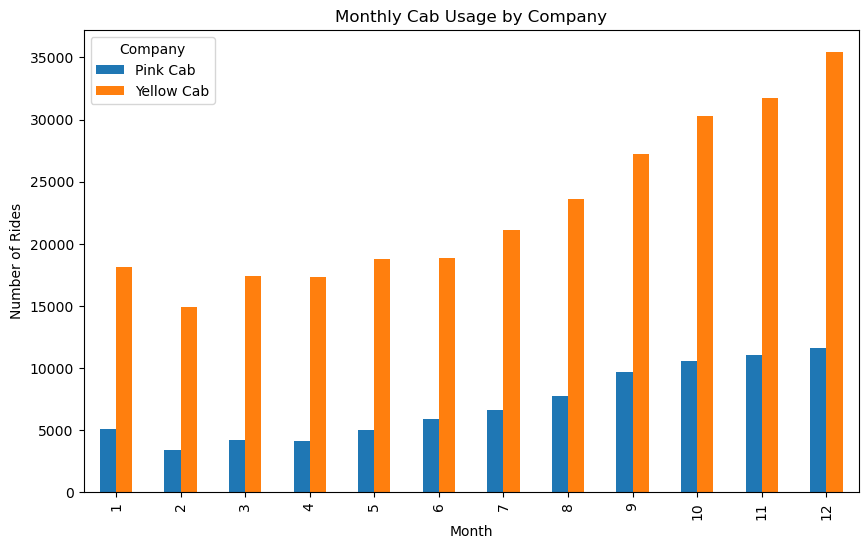

In [75]:

#Analyzing Seasonality in Cab Usage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Grouping data by month and company for rides count
monthly_rides = master_data.groupby(['Month', 'Company'])['Transaction ID'].count().unstack()

# One-Way ANOVA to check for seasonality impacts
stat, pval = f_oneway(*[group.values for name, group in monthly_rides.iteritems()])
print('ANOVA test p-value for seasonality effect:', pval)

# Plotting the results
monthly_rides.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Cab Usage by Company')
plt.ylabel('Number of Rides')
plt.xlabel('Month')
plt.show()


The ANOVA test resulted in a very low p-value (approximately 1.70e-07), which suggests that there is a statistically significant effect of seasonality on cab usage.

The bar chart visualizes the number of rides per month for each company, with 'Pink Cab' and 'Yellow Cab' as the two companies in the dataset. We can see that the usage of Yellow Cab is consistently higher than Pink Cab throughout the year.

The increasing trend towards the end of the year for Yellow Cab could be due to a number of factors such as holidays, weather conditions, or special events, contributing to the seasonality observed in the data. For Pink Cab, while also increasing towards the end of the year, the difference between the months does not seem as pronounced as it is for Yellow Cab.

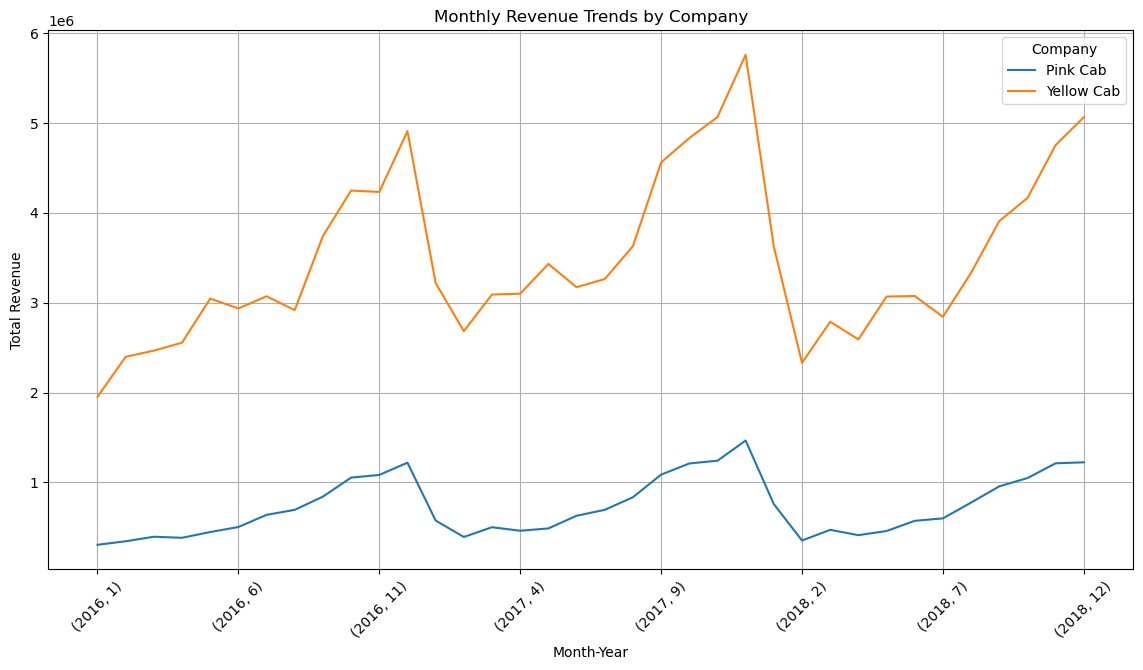

In [67]:

#Advanced Hypothesis: Seasonality Impact on Revenue
#Investigating whether there's a seasonality effect on the revenue of the cab companies.
# Convert 'Date of Travel' from Excel serial date to datetime

def excel_to_datetime(excel_serial):
    excel_epoch = datetime(1900, 1, 1)
    delta = timedelta(days=excel_serial - 2)  # Adjusting for the Excel leap year bug
    return excel_epoch + delta

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_to_datetime)
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Year'] = cab_data['Date of Travel'].dt.year

# Summing revenue by company, month, and year
monthly_revenue = cab_data.groupby(['Year', 'Month', 'Company'])['Price Charged'].sum().unstack()
monthly_revenue.plot(kind='line', figsize=(14, 7))
plt.title('Monthly Revenue Trends by Company')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


This visualization indicates some periodic fluctuations in revenue for both companies, suggesting that there could indeed be a seasonality component affecting their earnings.

Key observations from the chart:

Yellow Cab's revenue is significantly higher than Pink Cab's throughout the period shown.
Both companies experience peaks and troughs throughout the years, which may correspond to seasonal events or patterns in customer behavior.
For Yellow Cab, there are sharp increases in revenue at certain intervals, followed by decreases, indicating possible seasonal highs and lows.
Pink Cab's revenue also fluctuates, but the pattern does not seem as pronounced or as consistent as Yellow Cab's.

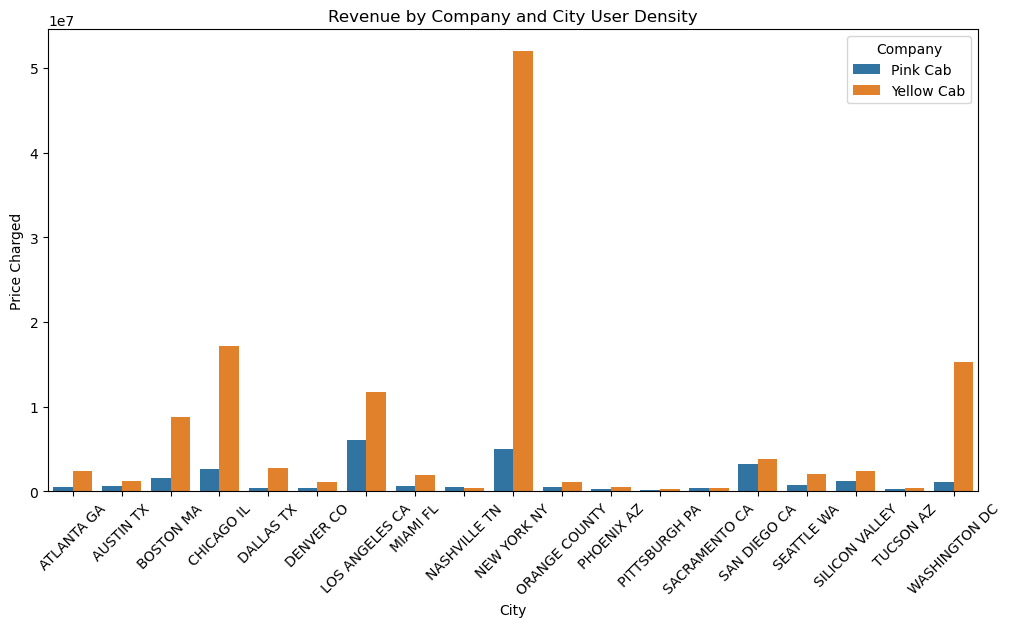

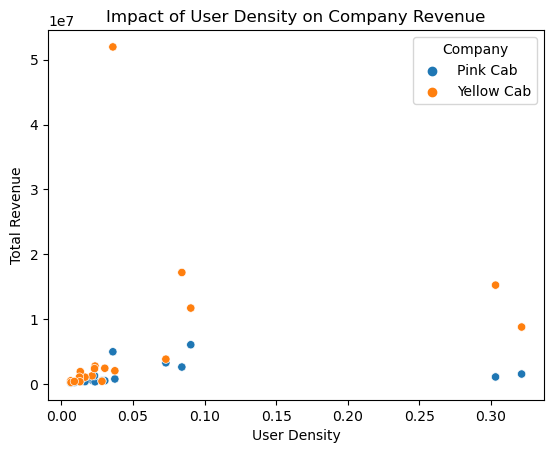

In [68]:

#Hypothesis: Impact of City's Cab User Density on Cab Company Performance

import pandas as pd

# Convert population and user strings to integers (assuming data is loaded into DataFrame city_data)
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data['User Density'] = city_data['Users'] / city_data['Population']


cab_data['Price Charged'] = cab_data['Price Charged'].astype(float)
cab_data['Cost of Trip'] = cab_data['Cost of Trip'].astype(float)

# Merging city data with cab data
full_data = pd.merge(cab_data, city_data[['City', 'User Density']], on='City', how='left')

# Group by company and city and calculate total revenue
company_performance = full_data.groupby(['Company', 'City'])['Price Charged'].sum().reset_index()

# Adding user density to the analysis
company_performance = pd.merge(company_performance, city_data[['City', 'User Density']], on='City', how='left')

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=company_performance, x='City', y='Price Charged', hue='Company')
plt.title('Revenue by Company and City User Density')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to visualize relationship between user density and revenue
sns.scatterplot(data=company_performance, x='User Density', y='Price Charged', hue='Company')
plt.title('Impact of User Density on Company Revenue')
plt.xlabel('User Density')
plt.ylabel('Total Revenue')
plt.show()


The investigation explores the correlation between city cab user density and the performance of two prominent cab companies, Pink Cab and Yellow Cab. Data from city demographics have been merged with cab transaction details to evaluate the influence of the cab user base relative to the total city population on the revenue of each company.

The analysis presented in the bar plot reveals that Yellow Cab consistently achieves higher revenue across most cities when compared to Pink Cab. The scatter plot aims to delve deeper into the dynamics between user density and revenue generation. It appears that Yellow Cab's revenue data points are widely distributed across different user densities, indicating no apparent direct correlation. Pink Cab's revenue also does not exhibit a significant correlation with increased user density.

In [69]:
# Check the data type of 'Date of Travel' column
print(cab_data['Date of Travel'].dtype)

# Extract year, month, and day from 'Date of Travel'
cab_data['Year'] = cab_data['Date of Travel'].dt.year
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Day'] = cab_data['Date of Travel'].dt.day

# Optionally, extract the day of the week (0=Monday, 6=Sunday)
cab_data['DayOfWeek'] = cab_data['Date of Travel'].dt.dayofweek


datetime64[ns]


In [70]:
# Calculate profit for each ride
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Group data by Year and Month to summarize rides and profit
monthly_summary = cab_data.groupby(['Year', 'Month']).agg(
    Total_Rides=('Transaction ID', 'count'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit=('Profit', 'mean')
).reset_index()

# Display the summarized data
print(monthly_summary)


    Year  Month  Total_Rides  Total_Profit  Average_Profit
0   2016      1         4646  9.102610e+05      195.923585
1   2016      2         5724  1.096645e+06      191.587127
2   2016      3         6377  1.002566e+06      157.215927
3   2016      4         6600  1.028728e+06      155.867920
4   2016      5         7534  1.344324e+06      178.434347
5   2016      6         7397  1.321995e+06      178.720455
6   2016      7         8939  1.130668e+06      126.487041
7   2016      8         9190  9.816933e+05      106.821907
8   2016      9        10984  1.466762e+06      133.536248
9   2016     10        13031  1.613374e+06      123.810423
10  2016     11        12549  1.725599e+06      137.508882
11  2016     12        14348  2.017891e+06      140.639213
12  2017      1         8188  1.411670e+06      172.407204
13  2017      2         6553  1.189825e+06      181.569584
14  2017      3         7722  1.360119e+06      176.135542
15  2017      4         7859  1.312943e+06      167.0623

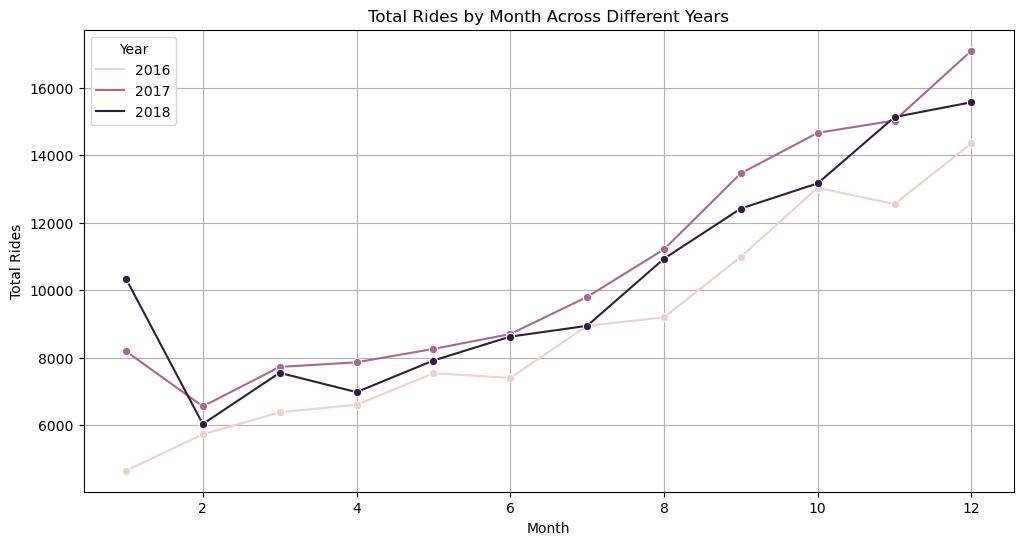

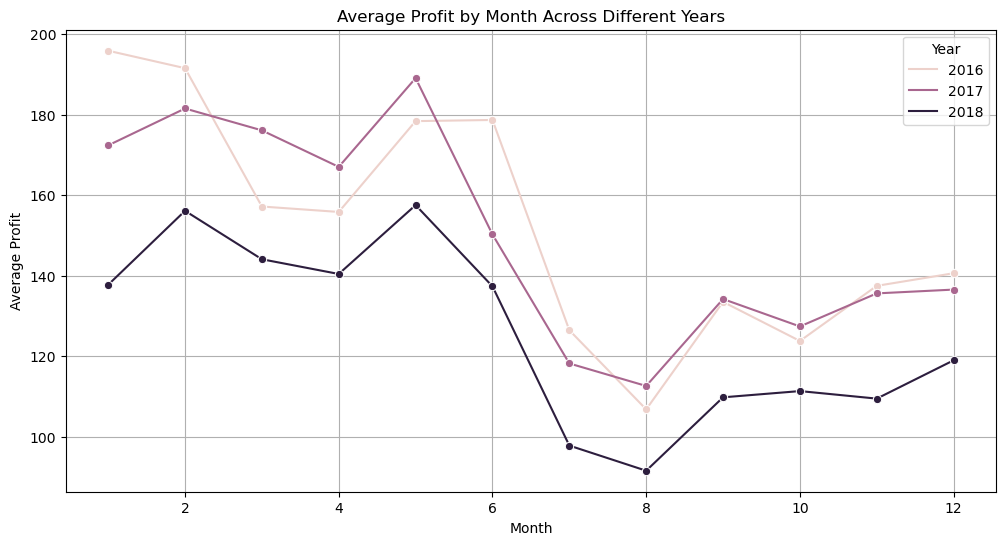

In [71]:

#Plotting Seasonality Trends
#Visualize the data to observe any seasonal trends in ride count or profit:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot total rides by month across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Total_Rides', hue='Year', marker='o')
plt.title('Total Rides by Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot average profit by month across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Average_Profit', hue='Year', marker='o')
plt.title('Average Profit by Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.legend(title='Year')
plt.grid(True)
plt.show()



The seasonal trends in ride count and profit across different years have been visualized to discern patterns in the data. The first plot illustrates total rides by month, segmented by year, displaying a general increase in rides as the year progresses, with noticeable peaks toward the end of each year. The consecutive years show an ascending trajectory in the number of rides, with 2018 reflecting the highest counts, indicating potential growth or increased demand for rides over time.

The second plot portrays average profit by month across the same years, revealing a different pattern. The average profit does not increase monotonically towards the year-end like the ride count does. Instead, there are fluctuations with peaks and troughs that vary by year. The year 2017 stands out with higher average profits in some months compared to 2016 and 2018, suggesting that factors beyond ride count, such as pricing strategies or operational efficiencies, may impact profitability.

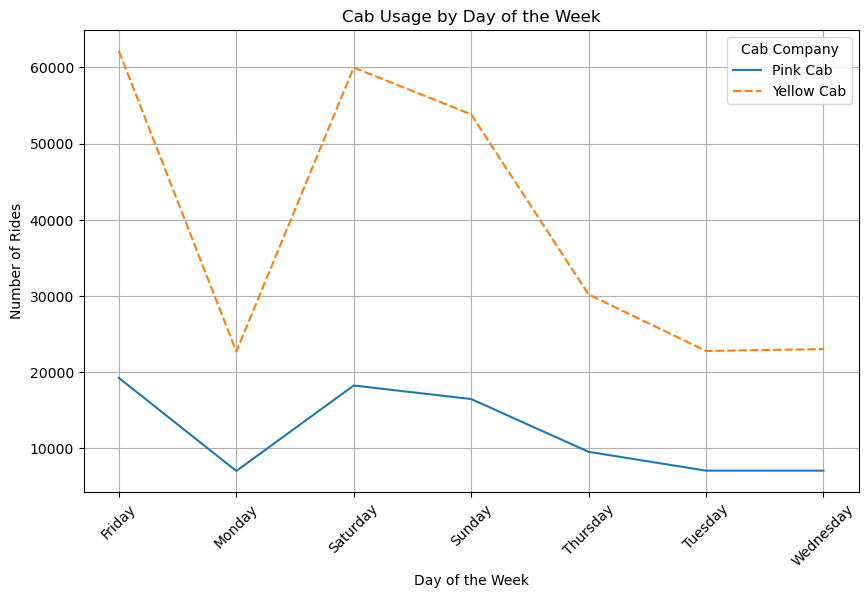

In [72]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date of Travel' is already in datetime format
cab_data['Weekday'] = cab_data['Date of Travel'].dt.day_name()

# Group by Weekday
weekday_usage = cab_data.groupby(['Weekday', 'Company'])['Transaction ID'].count().unstack()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_usage)
plt.title('Cab Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Cab Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



The provided line graph depicts cab usage by day of the week, comparing the number of rides for Pink Cab and Yellow Cab. It is evident from the graph that the number of rides for Yellow Cab is significantly higher than Pink Cab across all days. Notably, there is a peak in rides for Yellow Cab on Saturday, which then declines toward the beginning of the week, reaching its lowest on Wednesday. Conversely, Pink Cab shows a less pronounced variation throughout the week, maintaining a relatively flat trend with a slight increase on Fridays and a dip on Sundays.

This pattern may suggest that Yellow Cab is the preferred choice for weekend activities, which typically see a surge in cab usage, while Pink Cab's demand remains comparatively steady throughout the week. The data can be interpreted as indicating different customer usage behaviors for the two companies, potentially influenced by varying service offerings, pricing models, customer loyalty, or brand presence in different market segments.